In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from starkhelium import *
ea_to_debye = 1/0.393430307

In [2]:
n_1, l_1, m_1 = 70, 69, 69
n_2, l_2, m_2 = 71, 70, 70
field_orientation='parallel'
dm_allow=[0,-1,+1]
step_params=['flat',0.005]
transition_dipole_moment = np.abs(stark_int(n_1, n_2, l_1, l_2, m_1, m_2, 
                                  field_orientation, dm_allow, step_params)) * e*a_0 # in atomic units e a_0
print('Transition dipole moment: ', transition_dipole_moment/(e*a_0), ' (a.u.)')
print('Transition dipole moment: ', transition_dipole_moment*ea_to_debye/(e*a_0), ' Debye')

Transition dipole moment:  3476.95686325  (a.u.)
Transition dipole moment:  8837.54200271  Debye


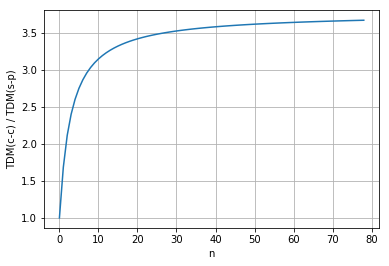

In [3]:
tdm_cc = []
tdm_sp = []
for i in np.arange(1,80):
    n_1 = i
    l_1, m_1 = n_1-1, n_1-1
    n_2 = n_1+1
    l_2, m_2 = n_2-1, n_2-1
    
    transition_dipole_moment = np.abs( stark_int(n_1, n_2, l_1, l_2, m_1, m_2, 
                                       field_orientation, dm_allow, step_params)) * e*a_0 # in atomic units e a_0
    #print('Transition dipole moment: ', transition_dipole_moment/(e*a_0), ' (a.u.)')
    tdm_cc.append(transition_dipole_moment/(e*a_0))

    n_1 = i
    l_1, m_1 = 0, 0
    n_2 = n_1+1
    l_2, m_2 = 1, 0
    
    transition_dipole_moment = np.abs( stark_int(n_1, n_2, l_1, l_2, m_1, m_2, 
                                       field_orientation, dm_allow, step_params)) * e*a_0 # in atomic units e a_0
    #print('Transition dipole moment: ', transition_dipole_moment/(e*a_0), ' (a.u.)')
    tdm_sp.append(transition_dipole_moment/(e*a_0))
    
plt.plot(np.array(tdm_cc)/np.array(tdm_sp))
plt.xlabel('n')
plt.ylabel('TDM(c-c) / TDM(s-p)')
plt.grid()